In [53]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

import sweetviz # for Exploratory data analysis (EDA)


import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [11]:
#!pip install autoviz

In [12]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (1197, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    15 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


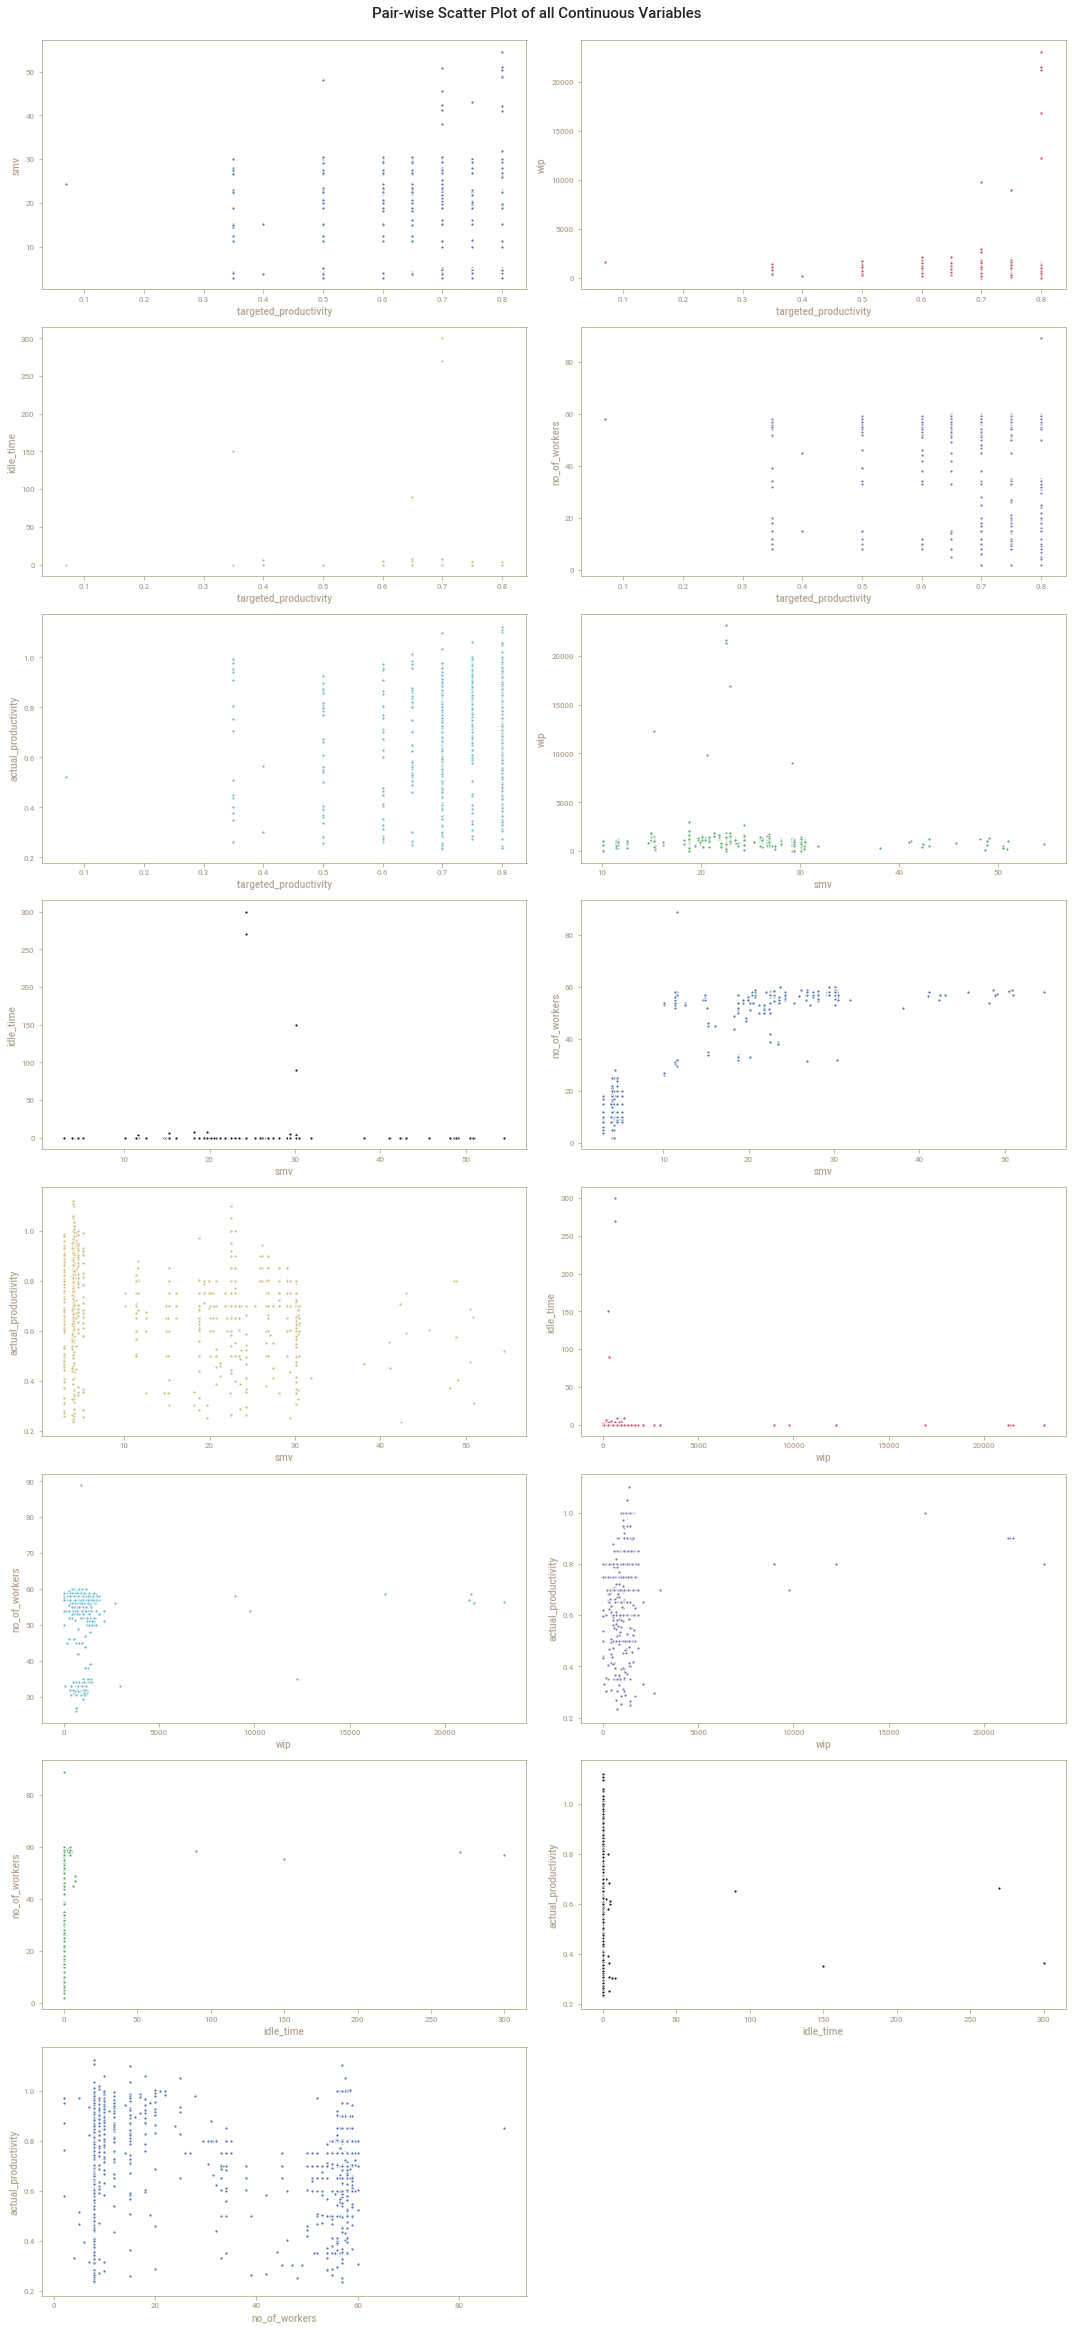

Could not draw Distribution Plot


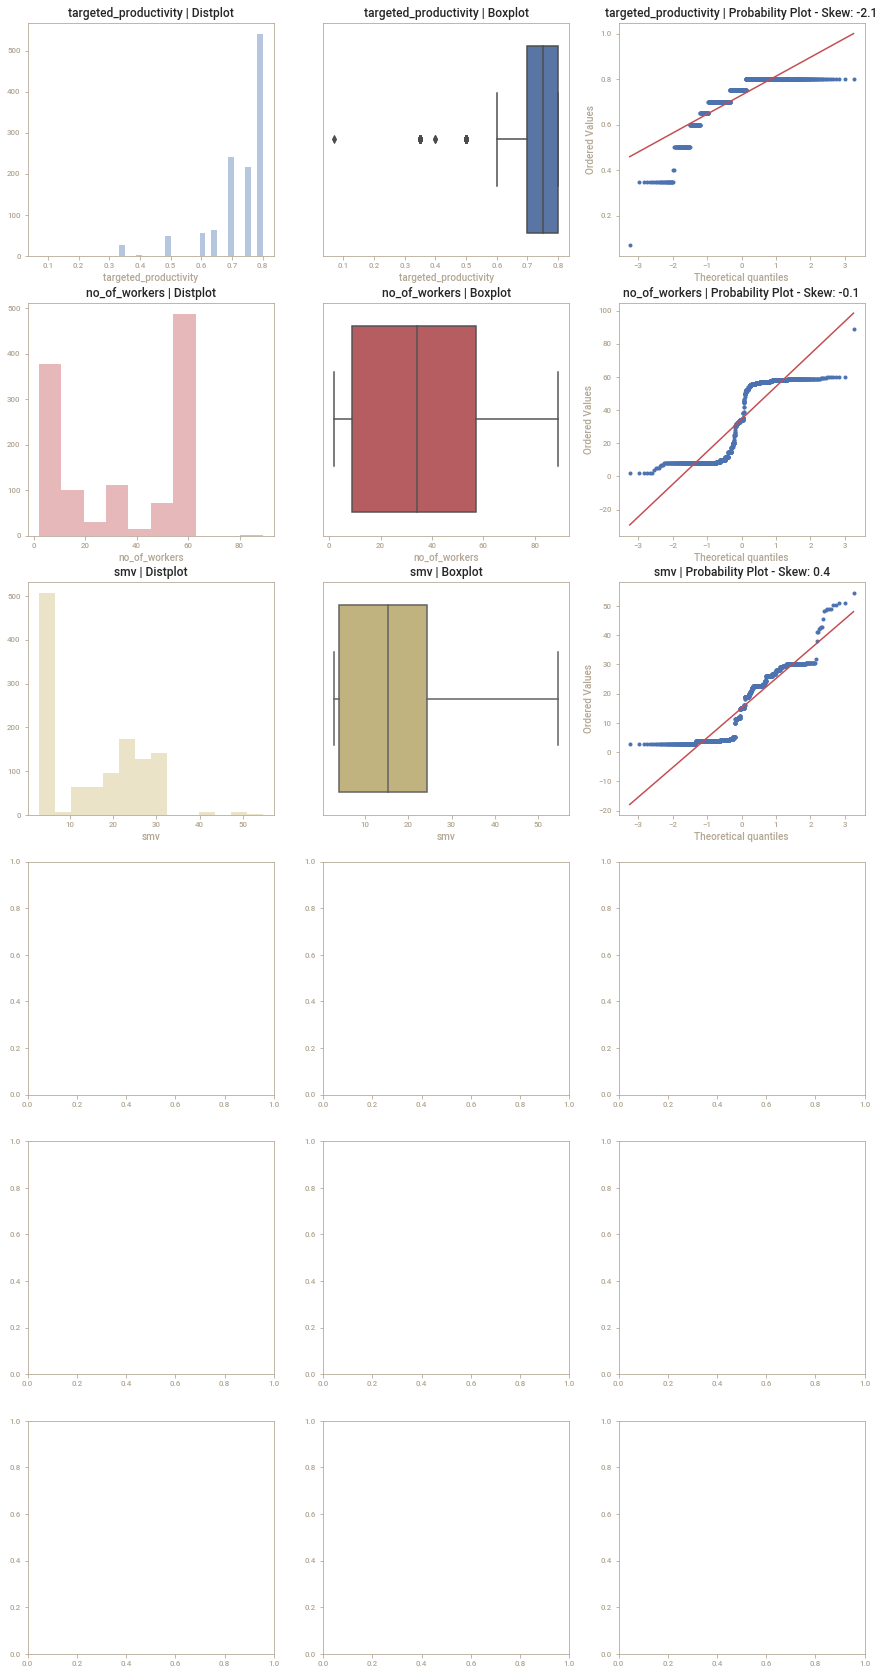

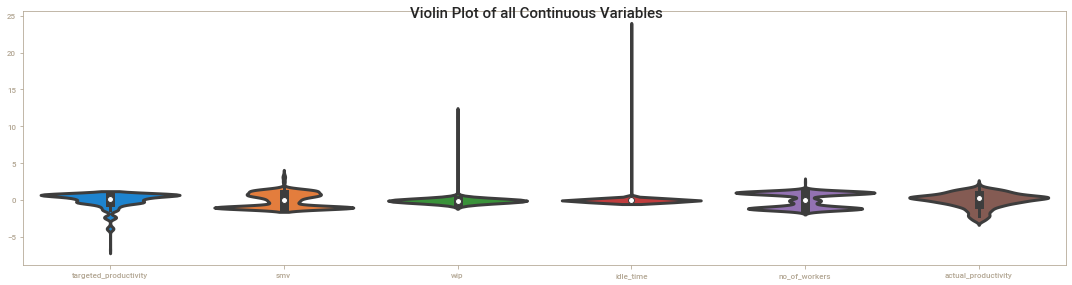

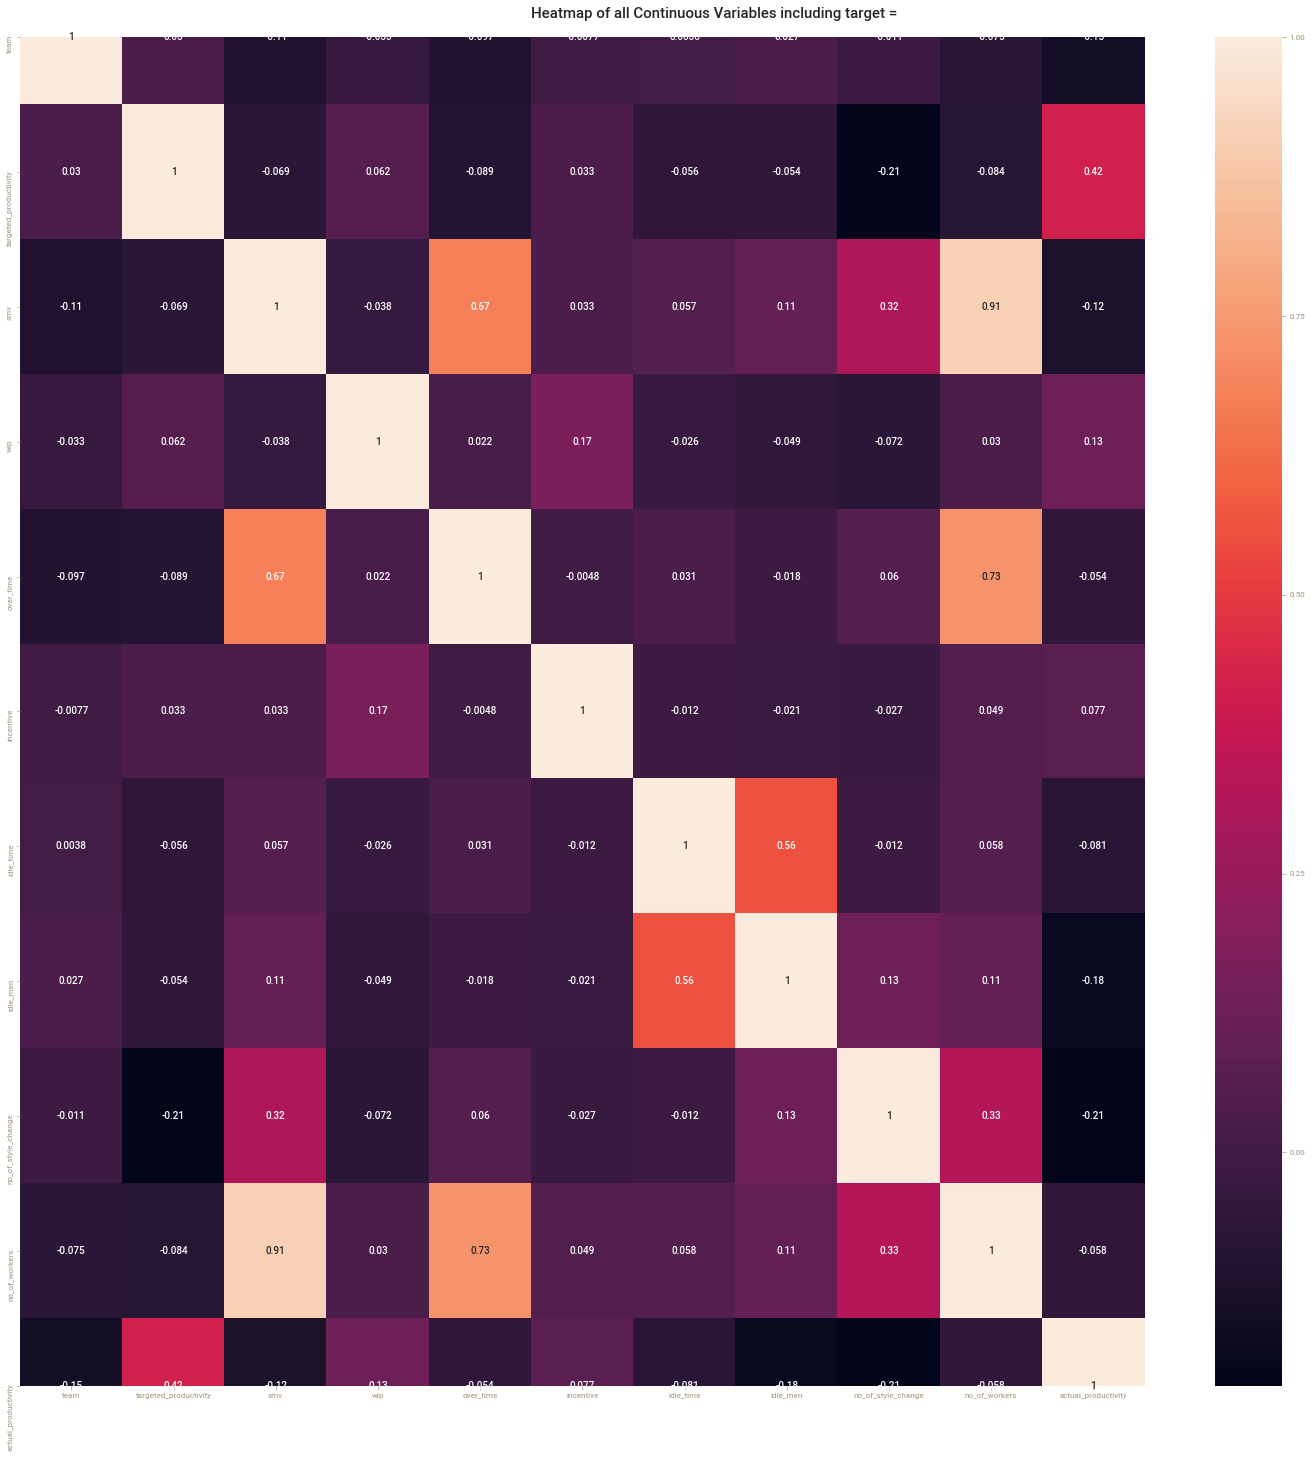

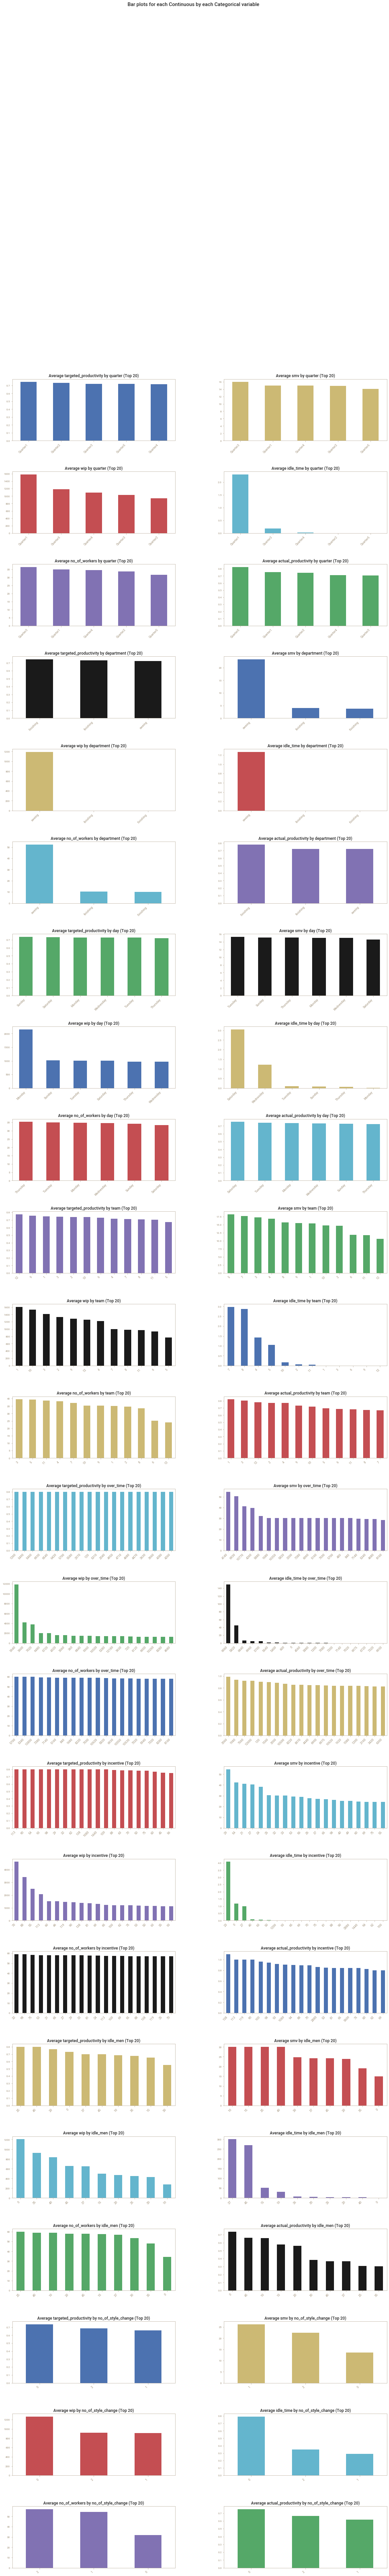

Time to run AutoViz (in seconds) = 13.513

 ###################### VISUALIZATION Completed ########################


In [13]:
filename = 'garments_worker_productivity.csv'
sep = ","
dft = AV.AutoViz(
    filename, 
    sep, 
    header=0, 
    verbose=0, 
    lowess=False, 
    chart_format='svg', 
    max_rows_analyzed=150000, 
    max_cols_analyzed=30
)

In [14]:
df = pd.read_csv('garments_worker_productivity.csv')

In [15]:
my_report = sweetviz.analyze([df, "Dataset"], target_feat = 'actual_productivity' )

                                             |                                             | [  0%]   00:00 ->…

In [16]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [18]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

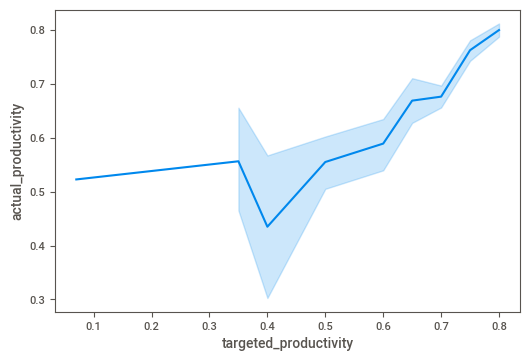

In [19]:
sns.lineplot(y = df['actual_productivity'], x = df['targeted_productivity'])
plt.show()

In [20]:
# We do not require the following columns as they are used for identification purposes only. Also, not the targeted_productivity
# date, department, quarter, day, team, targeted_productivity

In [21]:
df = df.drop(columns = ['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity'])

In [22]:
df.head()

smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [23]:
df.shape

(1197, 9)

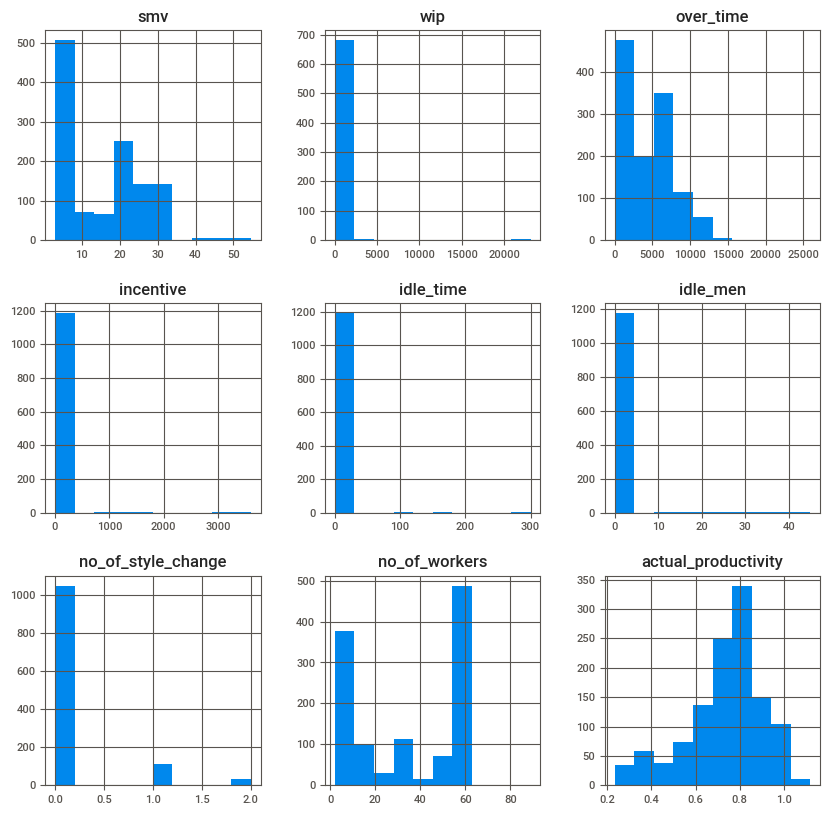

In [24]:

df.hist(figsize = (10,10))
plt.show()

In [25]:
df['smv'].fillna(df['smv'].median(), inplace = True)
df['wip'].fillna(df['wip'].median(), inplace = True)
df['over_time'].fillna(df['over_time'].median(), inplace = True)
df['incentive'].fillna(df['incentive'].median(), inplace = True)
df['idle_time'].fillna(df['idle_time'].median(), inplace = True)
df['idle_men'].fillna(df['idle_men'].median(), inplace = True)
df['no_of_style_change'].fillna(df['no_of_style_change'].median(), inplace = True)
df['no_of_workers'].fillna(df['no_of_workers'].median(), inplace = True)
df['actual_productivity'].fillna(df['actual_productivity'].median(), inplace = True)

In [26]:
df.shape

(1197, 9)

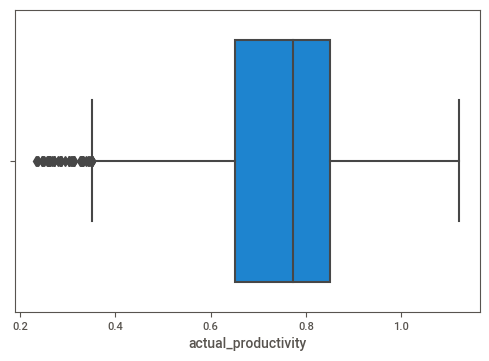

In [27]:
sns.boxplot(df['actual_productivity'])
plt.show()

In [28]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
   

In [29]:
df = min_max_scaling(df)

In [30]:
df.head()

smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.450252  0.047631   0.273148   0.027222        0.0       0.0   
1  0.020132  0.044646   0.037037   0.000000        0.0       0.0   
2  0.164731  0.041575   0.141204   0.013889        0.0       0.0   
3  0.164731  0.041575   0.141204   0.013889        0.0       0.0   
4  0.445219  0.050314   0.074074   0.013889        0.0       0.0   

   no_of_style_change  no_of_workers  actual_productivity  
0                 0.0       0.655172             0.797332  
1                 0.0       0.068966             0.736180  
2                 0.0       0.327586             0.639274  
3                 0.0       0.327586             0.639274  
4                 0.0       0.620690             0.639062

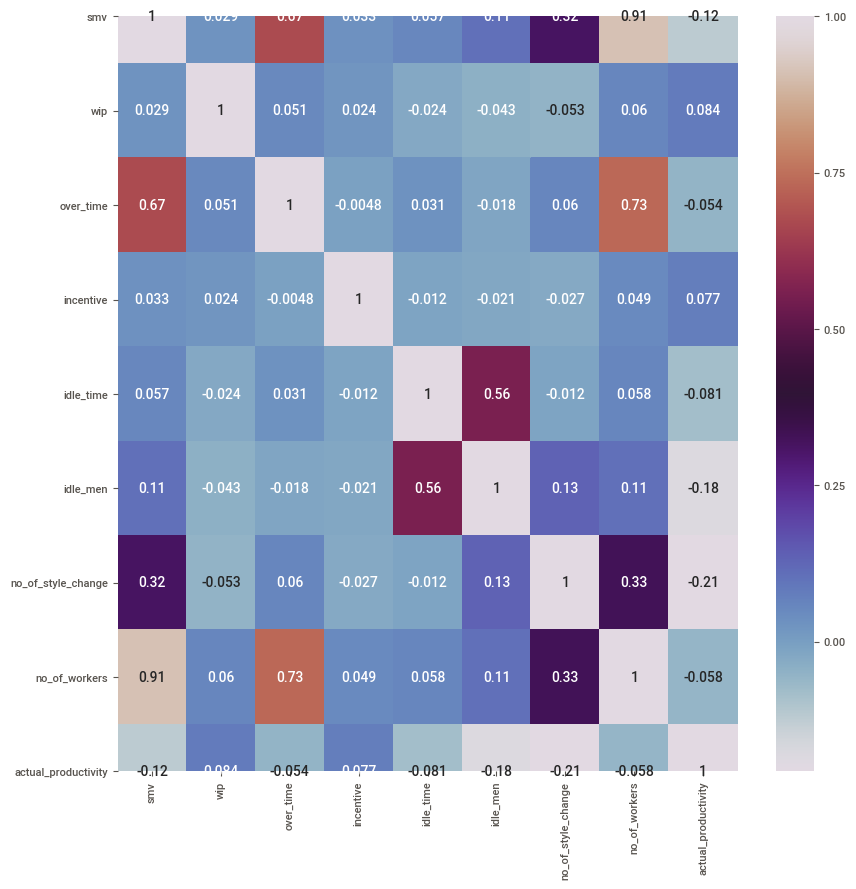

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'twilight', annot = True)
plt.show()

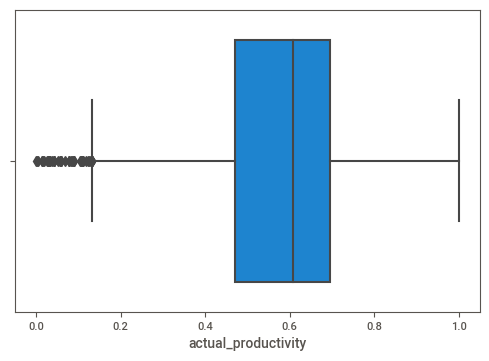

In [32]:
sns.boxplot(df['actual_productivity'])
plt.show()

In [33]:
df.describe()

smv          wip    over_time    incentive    idle_time  \
count  1197.000000  1197.000000  1197.000000  1197.000000  1197.000000   
mean      0.235427     0.048429     0.176214     0.010614     0.002434   
std       0.211832     0.060465     0.129198     0.044495     0.042366   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.020132     0.041661     0.055556     0.000000     0.000000   
50%       0.239257     0.044646     0.152778     0.000000     0.000000   
75%       0.413473     0.046550     0.268519     0.013889     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          idle_men  no_of_style_change  no_of_workers  actual_productivity  
count  1197.000000         1197.000000    1197.000000          1197.000000  
mean      0.008206            0.075188       0.374826             0.565431  
std       0.072644            0.213924       0.255146             0.196776  
min       0.000000            0.000000       0.000000             0.000000  
25%       0.000000            0.000000       0.080460             0.469817  
50%       0.000000            0.000000       0.367816             0.608558  
75%       0.000000            0.000000       0.632184             0.695303  
max       1.000000            1.000000       1.000000             1.000000

In [34]:
#for the actual productivity 
# q1 = 0.47
# q2 = 0.61
# q3 = 0.70

In [35]:
bin_labels = ['a', 'b']
df['actual_productivity'] = pd.qcut(df['actual_productivity'], q=2, labels = bin_labels)

In [36]:
df.head()

smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.450252  0.047631   0.273148   0.027222        0.0       0.0   
1  0.020132  0.044646   0.037037   0.000000        0.0       0.0   
2  0.164731  0.041575   0.141204   0.013889        0.0       0.0   
3  0.164731  0.041575   0.141204   0.013889        0.0       0.0   
4  0.445219  0.050314   0.074074   0.013889        0.0       0.0   

   no_of_style_change  no_of_workers actual_productivity  
0                 0.0       0.655172                   b  
1                 0.0       0.068966                   b  
2                 0.0       0.327586                   b  
3                 0.0       0.327586                   b  
4                 0.0       0.620690                   b

In [37]:
df['actual_productivity'].value_counts()

a    601
b    596
Name: actual_productivity, dtype: int64

In [38]:
features = df.drop(columns = 'actual_productivity')
label = df['actual_productivity']

In [39]:

cv = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))


scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), 
                           features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
#print(scoresKNN)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

scoresSV = cross_val_score(DummyClassifier(strategy = 'most_frequent'), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for ZeroR Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))


Accuracy for Logistic Regression Model: 0.602 (0.029)
Accuracy for Random Forest Model: 0.831 (0.025)
Accuracy for SVM Model: 0.606 (0.029)
Accuracy for KNN Model: 0.771 (0.030)
Accuracy for ZeroR Model: 0.502 (0.003)


In [40]:
#Feature Selection using Weka

df.to_csv('Dataset.csv', index = False)


In [41]:
df2 = df
df2.head()

smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.450252  0.047631   0.273148   0.027222        0.0       0.0   
1  0.020132  0.044646   0.037037   0.000000        0.0       0.0   
2  0.164731  0.041575   0.141204   0.013889        0.0       0.0   
3  0.164731  0.041575   0.141204   0.013889        0.0       0.0   
4  0.445219  0.050314   0.074074   0.013889        0.0       0.0   

   no_of_style_change  no_of_workers actual_productivity  
0                 0.0       0.655172                   b  
1                 0.0       0.068966                   b  
2                 0.0       0.327586                   b  
3                 0.0       0.327586                   b  
4                 0.0       0.620690                   b

In [42]:
df2 =df2.drop(columns = ['smv', 'wip', 'over_time', 'idle_time', 'idle_men','no_of_workers'])
df2.head()

incentive  no_of_style_change actual_productivity
0   0.027222                 0.0                   b
1   0.000000                 0.0                   b
2   0.013889                 0.0                   b
3   0.013889                 0.0                   b
4   0.013889                 0.0                   b

In [84]:
features = df2.drop(columns = 'actual_productivity')
label = df2['actual_productivity']
cv = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))


scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
#print(scoresKNN)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))



### edited this on scoresSV repeated twice
scoresDC = cross_val_score(DummyClassifier(strategy = 'most_frequent'), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for ZeroR Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))


Accuracy for Logistic Regression Model: 0.587 (0.029)
Accuracy for Random Forest Model: 0.703 (0.024)
Accuracy for SVM Model: 0.586 (0.029)
Accuracy for KNN Model: 0.725 (0.031)
Accuracy for ZeroR Model: 0.586 (0.029)


# Remove this comment || Hridoy Alam

In [80]:
scoresLR = cross_val_score(LogisticRegression(), features, label, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))



from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X  =  features
y = label

lr = LogisticRegression()
predicted = cross_val_predict(lr, X, y, cv=cv)

CM = confusion_matrix(y, predicted)

(TN, FN, TP, FP) = (CM[0][0], CM[1][0], CM[1][1], CM[0][1])

FPR = FP/(FP+TN)
recall = TP/(TP+FN)
precision = TP / (TP+FP)
f1 = 2*(recall*precision)/(recall+precision)
print("Logistic Regression")
print("Accuracy: ", mean(scoresLR))
print("Recall: ", recall)
print("F1-support: ", f1)
print("FPR: ", FPR)

Accuracy for Logistic Regression Model: 0.587 (0.029)
Logistic Regression
Accuracy:  0.5872619047619047
Recall:  0.9664429530201343
F1-support:  0.6998784933171326
FPR:  0.7886855241264559


## RandomForestClassifier

In [81]:
lr = RandomForestClassifier()
predicted = cross_val_predict(lr, X, y, cv=cv)
CM = confusion_matrix(y, predicted)

(TN, FN, TP, FP) = (CM[0][0], CM[1][0], CM[1][1], CM[0][1])

FPR = FP/(FP+TN)
recall = TP/(TP+FN)
precision = TP / (TP+FP)
f1 = 2*(recall*precision)/(recall+precision)

print("RandomForestClassifier")
print("Accuracy: ", mean(scoresRF))
print("Recall: ", recall)
print("F1-support: ", f1)
print("FPR: ", FPR)

RandomForestClassifier
Accuracy:  0.6975770308123249
Recall:  0.7751677852348994
F1-support:  0.7190661478599222
FPR:  0.3777038269550749


## Support Vector Classifier

In [83]:
lr = SVC()
predicted = cross_val_predict(lr, X, y, cv=cv)
CM = confusion_matrix(y, predicted)

(TN, FN, TP, FP) = (CM[0][0], CM[1][0], CM[1][1], CM[0][1])

FPR = FP/(FP+TN)
recall = TP/(TP+FN)
precision = TP / (TP+FP)
f1 = 2*(recall*precision)/(recall+precision)

print("Support Vector Classifier")
print("Accuracy: ", mean(scoresSV))
print("Recall: ", recall)
print("F1-support: ", f1)
print("FPR: ", FPR)

Support Vector Classifier
Accuracy:  0.5020938375350139
Recall:  0.964765100671141
F1-support:  0.6990881458966567
FPR:  0.7886855241264559


## KNeighborsClassifier

In [85]:
lr = KNeighborsClassifier()
predicted = cross_val_predict(lr, X, y, cv=cv)
CM = confusion_matrix(y, predicted)

(TN, FN, TP, FP) = (CM[0][0], CM[1][0], CM[1][1], CM[0][1])

FPR = FP/(FP+TN)
recall = TP/(TP+FN)
precision = TP / (TP+FP)
f1 = 2*(recall*precision)/(recall+precision)

print("KNeighborsClassifier")
print("Accuracy: ", mean(scoresKNN))
print("Recall: ", recall)
print("F1-support: ", f1)
print("FPR: ", FPR)

KNeighborsClassifier
Accuracy:  0.7251400560224089
Recall:  0.6140939597315436
F1-support:  0.6899151743638077
FPR:  0.16472545757071547


## DummyClassifier

In [88]:
lr = DummyClassifier()
predicted = cross_val_predict(lr, X, y, cv=cv)
CM = confusion_matrix(y, predicted)

(TN, FN, TP, FP) = (CM[0][0], CM[1][0], CM[1][1], CM[0][1])

FPR = FP/(FP+TN)
recall = TP/(TP+FN)
##-------     it will create a null-division ----
#precision = TP / (TP+FP)
#f1 = 2*(recall*precision)/(recall+precision)

print("DummyClassifier")
print("Accuracy: ", mean(scoresDC))
print("Recall: ", recall)
print("F1-support: ", f1)
print("FPR: ", FPR)

DummyClassifier
Accuracy:  0.5020938375350139
Recall:  0.0
F1-support:  0.6899151743638077
FPR:  0.0
